# 1. Empirisches Projekt
---
### **Skript zu Daten Manipulation, Visulallisierung und zur Regressions Analyse**
Dieses Sktipt soll euch helfen eine Datenanalyse sowie eine Simple oder eine Mutiple Regression aufzubauen.
-> Falls ihr fragen habt bitte sagt mir bescheid ich helfe gerne aus!


> E-Mail: riccardo.dandrea@live.de
> Ihr könnte gerne eine Mail schreiben wo wir uns Per zoom treffen können, falls ihr schwierigkeiten habt bei der Programmierung:
> BITTE schreibt in der MAIL:
> - Was habt ihr vor ?
> - Wo liegt das Problem mit Code und Fehlermeldung
> - und wann ihr euch Per zoom treffen wollt Tag und Uhrzeit.
>
> Gerne bitte ich auch eine Sprechstunde neben den Vorlesungen wo wir uns einmal wöchentlich treffen und Ihr mir direkt Fragen stellt könnte.


Für die Datenanalyse kann als unterstützung der Leitfaden "Leitfaden.ipynbn" als unterstützung genutzt werden.
Ab Punkt 2. wird erklärt wie Libaries installiert werden und wie die Daten eingelesen werden können. Sowie weitere Schritte zur Datenanalyse.

---

Informationen zu den Daten findest du unter folgenden 
Link: https://www.kaggle.com/datasets/shubhamgupta012/titanic-dataset

The dataset includes the following columns:

- PassengerId: Unique identifier for each passenger.
- Survived: Survival status of the passenger (0 = Not Survived, 1 = Survived).
- Pclass: Passenger class (1 = First class, 2 = Second class, 3 = Third class).
- Sex: Gender of the passenger.
- Age: Age of the passenger.
- SibSp: Number of siblings/spouses aboard the Titanic.
- Parch: Number of parents/children aboard the Titanic.
- Fare: Fare paid by the passenger.
- Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

# Google Colab:
---
##### 1. [Python Programmierung mit Google Colab link](https://colab.research.google.com/drive/1KXsA9WTFS9AxezEEaI3gYirv42b5-0rb#scrollTo=VJul2ijN-eHj)

<img src="Pictures_for_Explanation/1_Google_Colab_Starten.png" alt="Bildbeschreibung" width="700"/>



##### 2. Um ein Skript zu öffnen Navigiert auf Datei was oben Rechts vorzufinden ist und klickt "Notebook öffnen"

<img src="Pictures_for_Explanation/2_Datei_Optionen_öffnen.png" alt="Bildbeschreibung" width="700"/>

##### 3. Danach geht ihr  auf Github und fügt folgenden Link hinzu https://github.com/RiccardoDAndrea/Python-Crashkurs

<img src="Pictures_for_Explanation/3_Zuletzt_Geöffnet.png" alt="Bildbeschreibung" width="700"/>

##### 4. Nachdem Laden werdet ihr mehere Datein wie Skripte vorfinden.
<img src="Pictures_for_Explanation/4_Github_URL_eingeben.png" alt="Bildbeschreibung" width="700"/>

##### 5. Für die Mutiple Lineare Regression wählt ihr Python_LOG.ipynb und somit habt ihr erfolgreich das Skript zur bearbeitung eingeladen
<img src="Pictures_for_Explanation/5_Python_MLR.png" alt="Bildbeschreibung" width="700"/>


## Daten einladen
---

In [1]:
import os
if not os.path.exists("Data"):
    print("Ordner Data erstellt")
    os.makedirs("Data") 
elif os.path.exists("Data"):
    print("Ordner Data ist bereits vorhanden")


if not os.path.exists("LOG_Output"):
    print("Ordner LOG_Output erstellt")
    os.makedirs("LOG_Output") 
elif os.path.exists("LOG_Output"):
    print("Ordner LOG_Output ist bereits vorhanden")

# Erstellt dir ein Ordner wo du deine Daten speichern kannst

Ordner Data ist bereits vorhanden
Ordner LOG_Output erstellt


In [2]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Hier wird der Download für den Datensatz vorbereitet
file_id = '1uujka4TJygnHSrai5rDmao8z9SeP_PsE'
download_link = f"https://drive.google.com/uc?id={file_id}"

In [4]:
# Einen Datensatz mit Pandas laden
df = pd.read_csv(download_link, sep = ",")
df_for_piePlot = df["Survived"]
df.to_csv("Data/titantic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

Um Redundante Spalten zu entfern kannst du folgende Funktion nutzen:

In [6]:
#df.drop(columns=["Spalte"], inplace=True) #<- Füge hier deine Spalte ein die du entferenen willst

## Anpassung der Datentypen
---
Bevor Daten richtig Manipuliert werden können ist es von wichtigkeit die Datentypen anzupassen.
Welche Datentypen es gibt kannst du im Detail im Leitfaden nachlesen unter Punkt 1.3.

Folgende Datentypen gibt es:

-> `"string"`

-> `"int"`

-> `"float"`

-> `"bool"`

-> `"category"`

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Entscheide nun im folgenden welcher Datentyp am besten wäre für  deine Daten:**

In [8]:
df['Survived'] = df["Survived"].astype("category")
# df['Age'] = df['Age'].astype("int")
# df['Name'] = df['Name'].astype("Dein_Datentyp")
# df['Sex'] = df['Sex'].astype("Dein_Datentyp")
# df['Ticket'] = df['Ticket'].astype("Dein_Datentyp")
# df['Cabin'] = df['Cabin'].astype("Dein_Datentyp")
# df['Embarked'] = df['Embarked'].astype("Dein_Datentyp")

print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 77.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Statistische Zusammenfassung:
---

In [9]:
df.describe().round(2)

with open('LOG_Output/out.txt', 'w') as f:
    f.write(df.describe().round(2).to_string()) 

Umgang mit NaN-Werten (Not a Number):
---
NaN Werte sind Daten die nicht richtig erhoben worden oder auch fehler enthalten

**Fehlende Werte:**
Der Umgang mit fehlenden Werten ist ein entscheidender Schritt bei der Datenvorbereitung und sollte für jede Spalte individuell betrachtet werden.

Die zentrale Frage sollte immer lauten: **Kann ich die fehlenden Werte sinnvoll ersetzen?**

Beispiel: Spalte `"Age"` (Alter)
In diesem Fall stellt sich die Frage: Kann man fehlende Werte in der Spalte `"Age"` sinnvoll ersetzen?

- Antwort: NEIN. Das Alter lässt sich nicht einfach durch den Median, den Modus, den Mittelwert oder den vorherigen Wert ersetzen. Ein solches Vorgehen könnte die Daten erheblich verfälschen, was letztlich dazu führen würde, dass das Modell ungenaue Vorhersagen trifft. Diese Art der Datenmanipulation würde dazu führen, dass das Modell auf falschen Annahmen basiert, was gravierende Auswirkungen auf die Regressionsanalyse und die Vorhersagegenauigkeit hätte.

In [10]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Im Folgenden sehen wir das Beispiel an unseren Datensatz und sehen
- Age fehlen 177 Werte
- Cabin fehlend 687 Werte
- Embarked fehlen 2 Werte.

Wie würdet ihr mit den fehlenden Werten umgehen begründet eure Entscheidung?

In [11]:
# Lösche die Zeilen mit NaN values. ACHTUNG hier werden aus deinem Dataframe ALLE Na values entfernt
df = df.dropna(subset=['Age'])
#df = df.dropna()

# Fülle die NaN values mit einem Wert deiner Wahl. ACHTUNG hier werden aus deinem Dataframe ALLE Na values ersetzt mit der eingefügten Zahl

#df = df.fillna() # Ein Zahl, Formel oder auch ein Funktion kann eingeben. Sollte jedoch immer ein Zahl (int oder float) returnen

# Fülle die NaN values mit dem Durchschnittswert der Spalte

#df["wage"]= df["wage"].fillna(df["wage"].mean()) # nur eine Spalte werden die Daten ersetzt
#df = df.fillna(df.mean()) #<- mean(), mode(), median() / Alle Spalten werden ersetzt

In [12]:
df.shape

(714, 12)

Es ist immer wieder sinnvoll sich die Daten anzuschauen, um zu sehen ob die Daten richtig verarbeitet wurden.

In [13]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Datenfilterung
---
Mit der möglichkeit Daten zufiltern kannst du deine Daten so unterteilen. Um Strukturen oder auch Gruppen festzuleggen die du später
genau untersuchen möchtest.

In [14]:
df_filtered_dead = df[(df["Survived"] == 0)] #<- ein Dataframe nur mit verstorben

In [15]:
df_filtered_dead

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


In [16]:
df_filtered_sur = df[(df["Survived"] == 1)]  #<- ein Dataframe nur mit den Überlebenden
df_filtered_sur.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [17]:
df_filtered = df[(df["Survived"] == 1) &
                     (df["Pclass"] == 1)]

df_filtered

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [18]:
df["Survived"].value_counts()

Survived
0    424
1    290
Name: count, dtype: int64

## Visualisation
---
Daten zu Visualisieren geben die neue und detalierte einsichten in deinen Daten daher ist es ratsam sich die Zeit zu nehmen und sich die Daten zu visualisieren

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

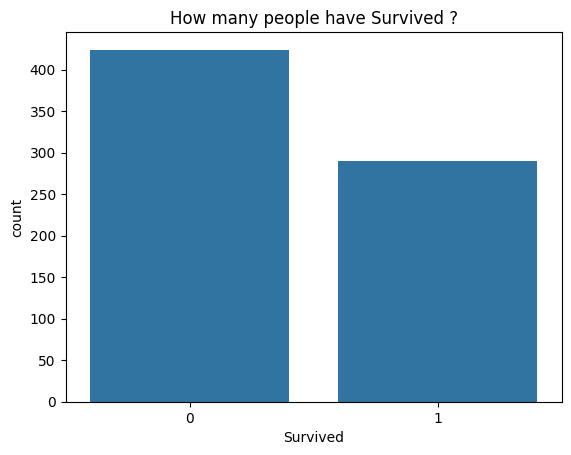

In [20]:
sns.countplot(x='Survived', data=df)
plt.title("How many people have Survived ?")
#plt.xlabel("Survial count plot")
#plt.legend(['First line', 'Second line'],loc="upper left")

plt.savefig("LOG_Output/Title_") 
plt.show()


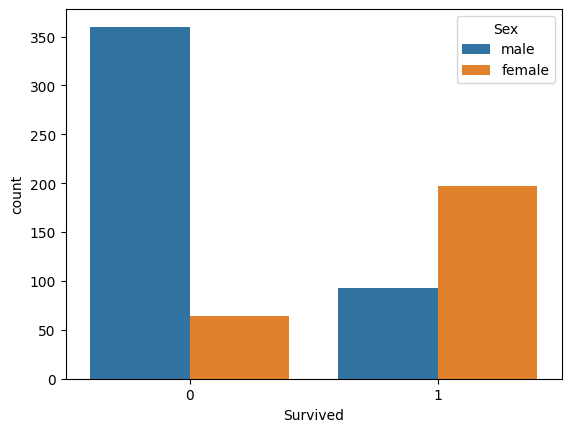

In [21]:
sns.countplot(x='Survived',hue='Sex',data=df)
plt.savefig("LOG_Output/Title_") 
plt.show()

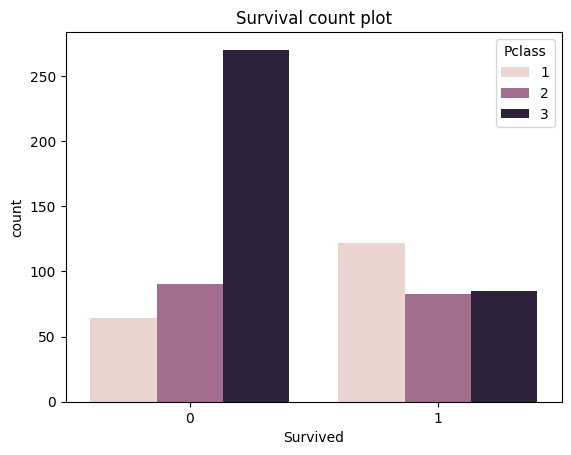

In [22]:
sns.countplot(x='Survived',hue='Pclass',data=df)
plt.title("Survival count plot")
plt.savefig("LOG_Output/Title_") 
plt.show()

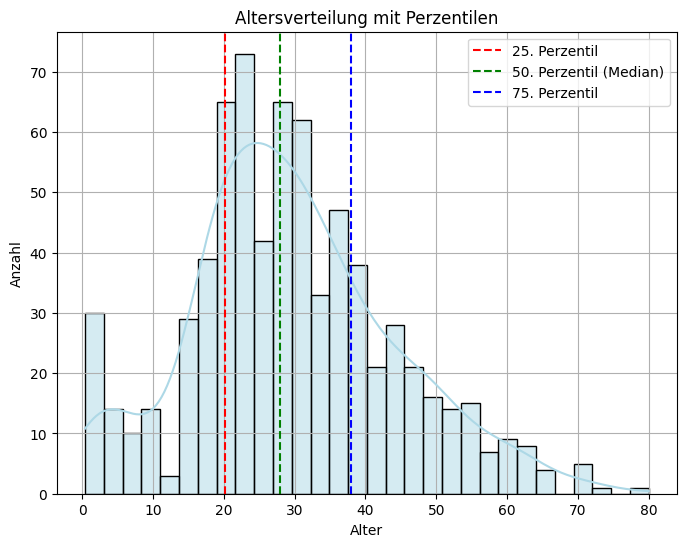

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Daten ohne NaN-Werte
data_age = df['Age'].dropna()

# Berechne die Perzentile (25., 50., 75.)
q25_age = np.percentile(data_age, 25)
q50_age = np.percentile(data_age, 50)  # Median
q75_age = np.percentile(data_age, 75)

# Erstelle den Plot
plt.figure(figsize=(8, 6))

# Plot der Verteilung
sns.histplot(data_age, kde=True, bins=30, color="lightblue")

# Füge die vertikalen Linien für die Perzentile hinzu
plt.axvline(x=q25_age, color='red', linestyle='--', label='25. Perzentil')
plt.axvline(x=q50_age, color='green', linestyle='--', label='50. Perzentil (Median)')
plt.axvline(x=q75_age, color='blue', linestyle='--', label='75. Perzentil')

# Plot-Details
plt.legend()
plt.grid(True)
plt.title('Altersverteilung mit Perzentilen')
plt.xlabel('Alter')
plt.ylabel('Anzahl')

plt.savefig("LOG_Output/Title_") 
plt.show()


In [24]:
df["Ticket"].value_counts()

Ticket
347082     7
3101295    6
CA 2144    6
347088     6
382652     5
          ..
250651     1
2693       1
349233     1
349236     1
370376     1
Name: count, Length: 542, dtype: int64

In [25]:
df = df.drop(columns=["Ticket","Parch","Embarked","Name","SibSp","PassengerId","Cabin","Fare"])
df.shape

(714, 4)

In [26]:
df.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


Um auch das Geschlecht in der Klassifikation zu berücksichtigen, müssen wir die Spalte von String auf Nummerische Werte umwandeln.
Hierfür ersetzten wir `"male"` mit dem int 0 und `"Female"` mit dem int 1.

In [27]:
df['Sex'].replace(['male','female'], [0, 1], inplace=True)

In [28]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
dtype: int64

Wir müssen bedenken das wir von den ursprünglichen Datensatz `(df)` 177 Werte entfernt haben da das Alter nicht bekannt war.

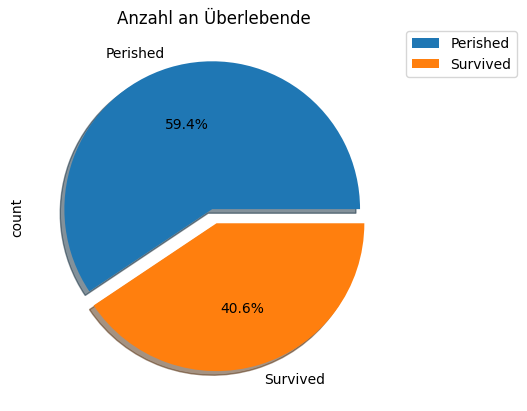

In [29]:
data = df["Survived"].value_counts()
labels = ['Perished', 'Survived']
ax = data.plot(kind="pie", 
               autopct='%1.1f%%', 
               shadow=True, 
               explode=[0.05, 0.05], 
               legend=True, 
               title='Anzahl an Überlebende', 
               labels=labels)

ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

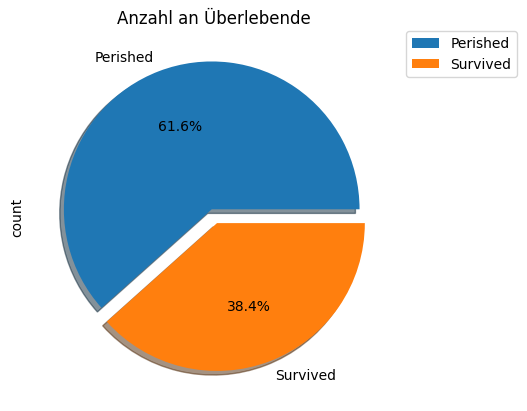

In [30]:
labels = ['Perished', 'Survived']
ax_pie = df_for_piePlot.value_counts().plot(kind="pie", 
               autopct='%1.1f%%', 
               shadow=True, 
               explode=[0.05, 0.05],
               labels=labels,
               legend=True, title='Anzahl an Überlebende')
ax_pie.legend(bbox_to_anchor=(1, 1.02), loc='upper left')